In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.colorbar import colorbar

sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 


## Asteroseismic model

In [4]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
df.head(1)

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,BC_GBP,BC_GRP,BC_J,BC_H,BC_K,ast_MKs,ast_MH,ast_MJ,ast_MG,ast_M_err
0,892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,8.3,...,-0.74,0.388,1.206,1.638,1.766,-1.671234,-1.543234,-1.111234,0.343766,0.206767


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


RuntimeError: LaTeX was not able to process the following string:
'Total # Stars: 5578'

Here is the full report generated by LaTeX:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./fc41e386c8e960661961bc5d13a387d8.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file fc41e386c8e960661961bc5d13a387d8.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.12 ...ze{25.000000}{31.250000}{\rmfamily Total #
                                                   Stars: 5578}
[1] (./fc41e386c8e960661961bc5d13a387d8.aux) )
(see the transcript file for additional information)
Output written on fc41e386c8e960661961bc5d13a387d8.dvi (1 page, 264 bytes).
Transcript written on fc41e386c8e960661961bc5d13a387d8.log.
 



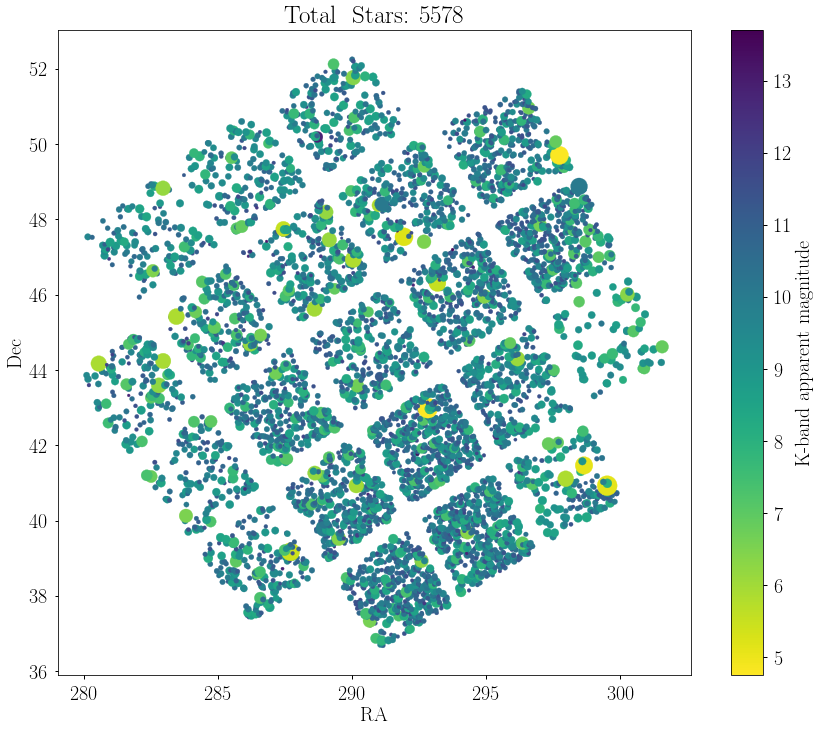

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
c=ax.scatter(df.ra, df.dec, s=df.parallax*80, c=df.Kmag,cmap='viridis_r')
plt.xlabel('RA')
plt.ylabel('Dec')
fig.colorbar(c, label='K-band apparent magnitude')
fig.tight_layout()
plt.title('Total # Stars: '+str(len(df)),fontsize=25)
plt.savefig('data_field.png')
plt.show()

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


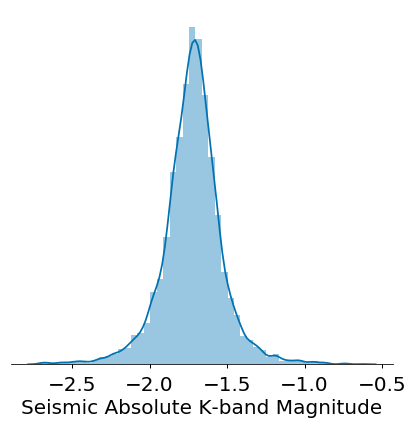

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(df['ast_MKs'], ax = ax)
plt.xlabel('Seismic Absolute K-band Magnitude')
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('seismic_kmag.png')
plt.show()

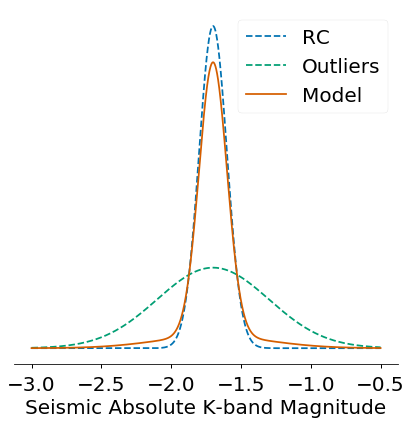

In [5]:
def normal(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2/(2*sigma**2))
rmu = -1.7
rsigma = .1
rsigo = 4. * rsigma
rQ = .85

x = np.linspace(-3, -0.5, len(df))
fg = normal(x, rmu, rsigma)
bg = normal(x, rmu, rsigo)
ll = rQ * fg + (1-rQ) * bg

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, fg,  linestyle='--', label='RC')
ax.plot(x, bg, linestyle='--', label='Outliers')
ax.plot(x, ll, label = 'Model')
ax.legend(loc='best', fontsize=20)

plt.yticks([])
plt.xlabel('Seismic Absolute K-band Magnitude')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('mixmod.png')

plt.show()

100%|██████████| 20/20 [00:00<00:00, 224.58it/s]


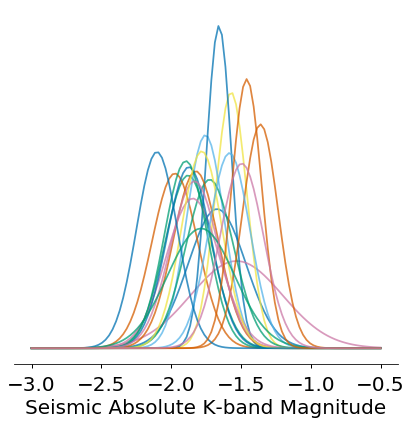

In [19]:
from tqdm import tqdm
def normal(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2/(2*sigma**2))

x = np.linspace(-3.0, -0.5, 100)
fig, ax = plt.subplots(figsize=(6,6))
for idx in tqdm(range(len(df[:20]))):
    ax.plot(x, normal(x, df['ast_MKs'][idx], df['ast_M_err'][idx]),alpha=.75)

plt.yticks([])
plt.xlabel('Seismic Absolute K-band Magnitude')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('infM.png')

plt.show()

In [20]:
df.ast_M_err[0]

0.20676678183177552

HR Diagram

In [21]:
df = pd.read_csv('/Users/Oliver/PhD/Gaia_Project/data/TRILEGAL_sim/k1.6b_K15b30_0910_new.all.out.txt',sep = '\s+')
df = df[:]
print(list(df))

['#Gc', 'logAge', '[M/H]', 'm_ini', 'logL', 'logTe', 'logg', 'm-M0', 'Av', 'comp', 'mbol', 'Kepler', 'g', 'r', 'i', 'z', 'DDO51_finf', 'J', 'H', 'Ks', 'Mact', 'stage']


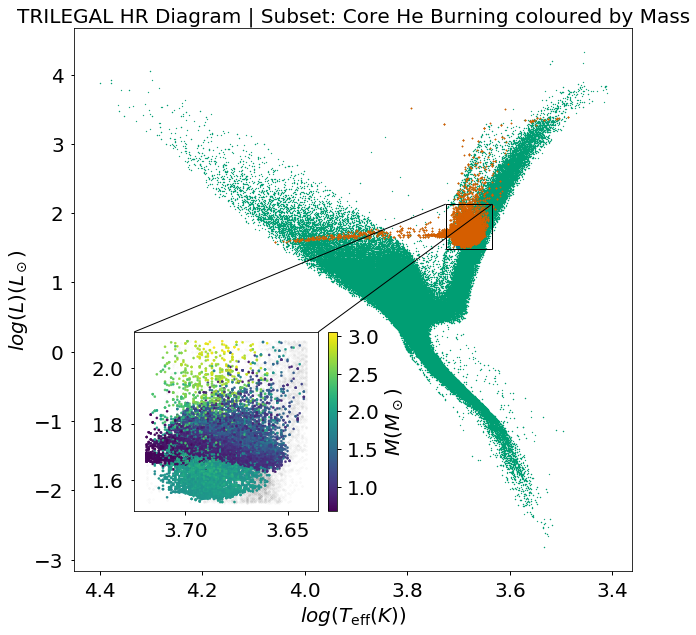

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(3.7,1.52,facecolor=None)
ax.scatter(df['logTe'], df['logL'],s=1)
df_rc = df[(df.stage == 4) | (df.stage == 5) | (df.stage == 6)]
ax.scatter(df_rc['logTe'], df_rc['logL'],s=2)

axins = inset_axes(ax, width='33%', height='33%',loc=3, borderpad=6.)
Telo, Tehi = 3.64, 3.72
Llo, Lhi = 1.52, 2.1
df_in = df[(df.logTe > Telo) & (df.logTe < Tehi) & (df.logL > Llo) & (df.logL < Lhi)]
sel = (df_in.stage.values == 4) | (df_in.stage.values == 5) | (df_in.stage.values == 6)
axins.scatter(df_in.logTe[~sel], df_in.logL[~sel], s=5, c='k',alpha=.01)
c = axins.scatter(df_in.logTe[sel], df_in.logL[sel], s=5, c=df_in.Mact[sel], cmap='viridis')

cax = inset_axes(axins,
                 width="5%",  # width = 10% of parent_bbox width
                 height="100%",  # height : 50%
                 loc=3,
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )
fig.colorbar(c, cax=cax, label=r'$M (M_\odot)$')
axins.invert_xaxis()

patch, pp1, pp2 = mark_inset(ax, axins, loc1=4, loc2=1, lw=1, ec='k', fc='none')
pp1.loc1 = 2
pp1.loc2 = 1
pp2.loc1 = 1
pp2.loc2 = 2

ax.set_xlabel(r'$log(T_{\rmeff} (K)$)')
ax.set_ylabel(r'$log(L)(L_\odot)$')
ax.set_title(r'TRILEGAL HR Diagram | Subset: Core He Burning coloured by Mass',fontsize=20)
ax.invert_xaxis()
plt.savefig('HRdiagram.png')
plt.show()

## Results

In [21]:
def read_paramdict(majorlabel, minorlabel='', sort='astero'):
    '''Reads in results for either:
        -A full run series (majorlabel) where the minorlabel is included as a
            column in the output.
        -A single run (majorlabel and minorlabel).

        Returns a pandas dataframe.
    '''
    loc = __outdir__+majorlabel+'/'

    if minorlabel != '':
        globlist = glob.glob(loc+sort+'_'+str(float(minorlabel))+'_*pars*.csv')
    else:
        globlist = glob.glob(loc+sort+'*_*pars*.csv')

    minorlabels = [os.path.basename(globloc).split('_')[1] for globloc in globlist]

    df = pd.DataFrame()
    for n, globloc in enumerate(globlist):
        sdf = pd.read_csv(globloc, index_col = 0)
        if minorlabels[n] != 'pars.csv':
            sdf[majorlabel] = minorlabels[n]
        df = df.append(sdf)

    return df.sort_values(by=majorlabel)
import os
import glob
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'

In [ ]:
knoc = read_paramdict('K_tempscale_noCorrection')
krc = read_paramdict('K_tempscale_Clump')
knoc['tempscale'] = knoc['K_tempscale_noCorrection'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['K_tempscale_Clump'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

In [ ]:
#Next step: Add best fit lines

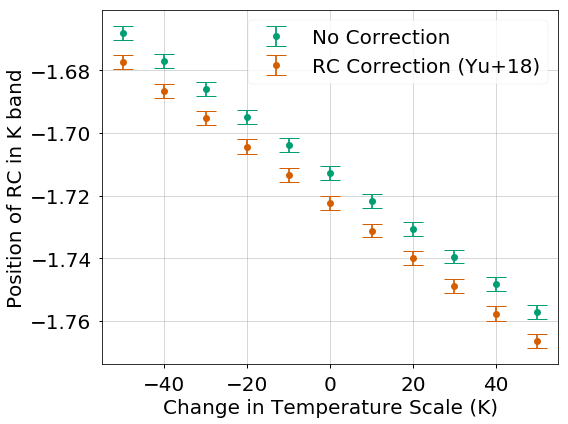

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(np.nan, np.nan)

(_, caps1,_) = plt.errorbar(knoc.tempscale, knoc.mu, yerr = knoc.mu_std, fmt='o', capsize=10, label='No Correction')
(_, caps2,_) = plt.errorbar(krc.tempscale, krc.mu, yerr = krc.mu_std, fmt='o',  capsize=10,label='RC Correction (Yu+18)')
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
plt.grid(alpha=.5)
plt.xlabel('Change in Temperature Scale (K)')
plt.ylabel('Position of RC in K band')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()